epoch: 1 loss = 5715.5547
epoch: 51 loss = 1418.3219
epoch: 101 loss = 555.3719
epoch: 151 loss = 378.8003
epoch: 201 loss = 342.2287
epoch: 251 loss = 334.5953
epoch: 301 loss = 332.9943
epoch: 351 loss = 332.6575
epoch: 401 loss = 332.5865
epoch: 451 loss = 332.5716
epoch: 501 loss = 332.5684
epoch: 551 loss = 332.5677
epoch: 601 loss = 332.5676
epoch: 651 loss = 332.5676
epoch: 701 loss = 332.5676
epoch: 751 loss = 332.5676
epoch: 801 loss = 332.5676
epoch: 851 loss = 332.5676
epoch: 901 loss = 332.5676
epoch: 951 loss = 332.5676


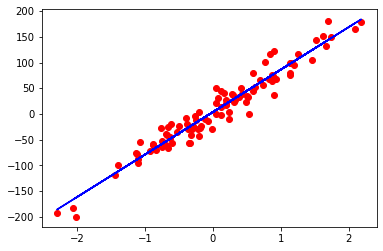

In [10]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

input_size = n_features
output_size = 1

learning_rate = 0.01
model = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 1000

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        print(f'epoch: {epoch+1} loss = {loss.item():.4f}')

#plot
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()
